In [1]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy
from PIL import Image

In [2]:
import pandas as pd
maindir = ""
data_given = pd.read_csv('./split1.csv')
data_given

,image_no,image_path,label
0,1,E:\SEM 6\classification\split\image_part_001.jpg,1
1,2,E:\SEM 6\classification\split\image_part_002.jpg,0
2,3,E:\SEM 6\classification\split\image_part_003.jpg,1
3,4,E:\SEM 6\classification\split\image_part_004.jpg,0
4,5,E:\SEM 6\classification\split\image_part_005.jpg,1
...,...,...,...
295,296,E:\SEM 6\classification\split\image_part_296.jpg,1
296,297,E:\SEM 6\classification\split\image_part_297.jpg,1
297,298,E:\SEM 6\classification\split\image_part_298.jpg,1
298,299,E:\SEM 6\classification\split\image_part_299.jpg,1


In [3]:
## Function to Load the Images
def loadData(df):
    dataframeObj = [[]]
    
    for sat_img in df.image_path:
        Reading_Sat = Image.open(sat_img).convert('L').resize((128, 128))
        Reading_Sat = np.asarray(Reading_Sat)
        Reading_Sat = Reading_Sat/255.
        
        dataframeObj[0].append(Reading_Sat)
    return np.array(dataframeObj)

In [4]:
df = loadData(data_given)

In [5]:
df

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 1.        ,
          0.25098039, 0.        ],
         [0.        , 0.        , 0.        , ..., 1.        ,
          0.25882353, 0.        ],
         [0.        , 0.        , 0.        , ..., 1.        ,
          0.25882353, 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

In [6]:
df.shape

(1, 300, 128, 128)

In [7]:
#split train and test for the 100 images
X = df[0]
y = data_given['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.2, random_state= 8)

In [9]:
# replace 28 with 512
train_X = X_train.reshape(-1, 128,128, 1)
test_X = X_test.reshape(-1, 128,128, 1)
train_X = X_train.astype('float32')
test_X = X_test.astype('float32')
train_Y, test_Y = y_train, y_test 

In [10]:
model = Sequential()
model.add(Conv2D(64, (2,2), input_shape=(128,128, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(loss = "binary_crossentropy", optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 64)      320       
                                                                 
 activation (Activation)     (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        16448     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

In [11]:
import tensorflow as tf
from keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
train_X.shape

(160, 128, 128)

Epoch 1/10
27/27 [==============================] - 13s 229ms/step - loss: 1.0400 - accuracy: 0.8000 - val_loss: 1.4039 - val_accuracy: 0.7073
Epoch 2/10
27/27 [==============================] - 5s 203ms/step - loss: 0.8995 - accuracy: 0.8000 - val_loss: 1.2057 - val_accuracy: 0.7073
Epoch 3/10
27/27 [==============================] - 6s 206ms/step - loss: 0.7739 - accuracy: 0.8000 - val_loss: 1.0231 - val_accuracy: 0.7073
Epoch 4/10
27/27 [==============================] - 6s 204ms/step - loss: 0.6610 - accuracy: 0.8000 - val_loss: 0.8752 - val_accuracy: 0.7073
Epoch 5/10
27/27 [==============================] - 6s 204ms/step - loss: 0.5805 - accuracy: 0.8000 - val_loss: 0.7574 - val_accuracy: 0.7073
Epoch 6/10
27/27 [==============================] - 5s 203ms/step - loss: 0.5331 - accuracy: 0.8000 - val_loss: 0.6859 - val_accuracy: 0.7073
Epoch 7/10
27/27 [==============================] - 6s 209ms/step - loss: 0.5096 - accuracy: 0.8000 - val_loss: 0.6527 - val_accuracy: 0.7073
Epoch

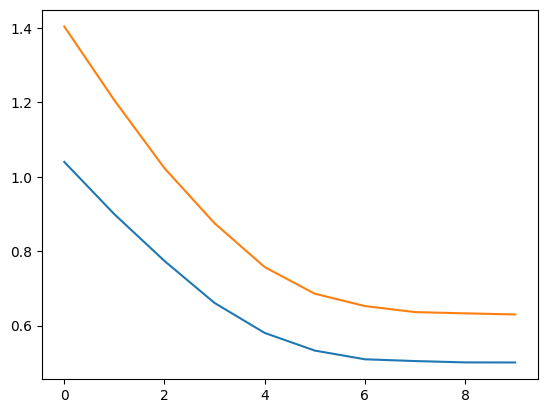

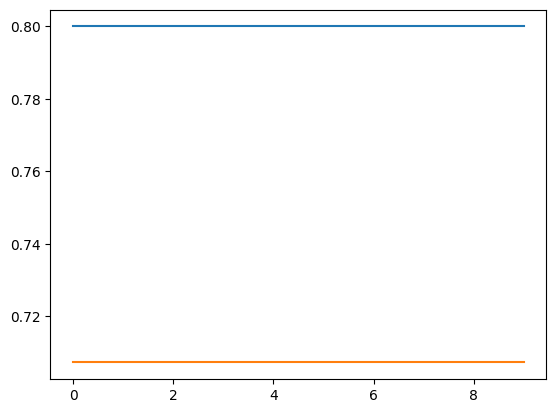

In [13]:
history = model.fit(train_X, y_train, batch_size=6, epochs=10, validation_data=(X_val, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

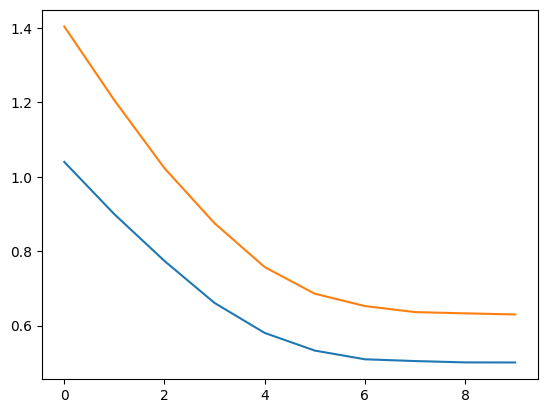

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

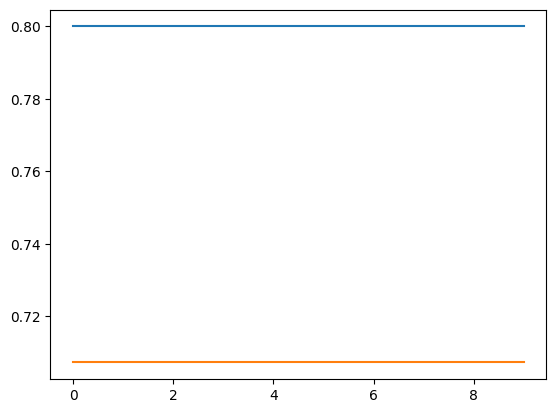

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [16]:
#Evaluate the model on the test data after training your model
score = model.evaluate(test_X,test_Y, verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 [==============================] - 1s 182ms/step - loss: 0.5739 - accuracy: 0.7475

Keras CNN binary accuracy: 0.747474730014801 



In [17]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on new data
predictions = model.predict(X_test)

# Convert predictions to binary values
predictions_binary = np.round(predictions)

# Calculate precision, recall, and F-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions_binary, zero_division=1)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', fscore)

4/4 [==============================] - 1s 190ms/step
Precision: [1.         0.74747475]
Recall: [0. 1.]
F-score: [0.         0.85549133]


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_binary)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[ 0 25]
 [ 0 74]]


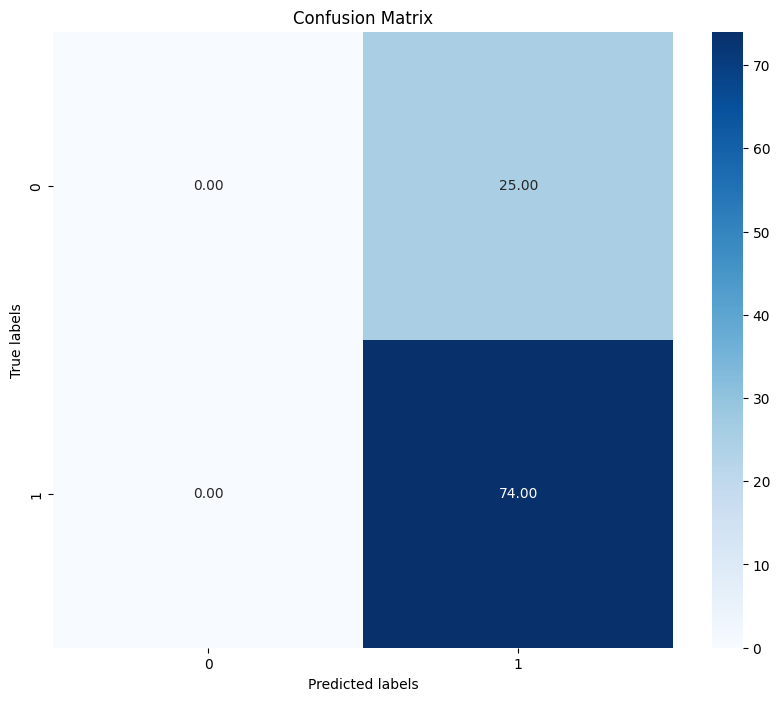

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [20]:
model1 = Sequential()
model1.add(Conv2D(64, (2,2), input_shape=(128,128, 1)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (2,2)))
model1.add(Activation('sigmoid'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Dense(32))
model1.add(Dropout(0.2))
model1.add(Activation('tanh'))
model1.add(Dense(1))
model1.add(Activation('softmax'))
model1.compile(loss = "binary_crossentropy", optimizer="adam",metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      320       
                                                                 
 activation_4 (Activation)   (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        16448     
                                                                 
 activation_5 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

Epoch 1/10
27/27 [==============================] - 9s 238ms/step - loss: 0.6204 - accuracy: 0.8000 - val_loss: 0.9560 - val_accuracy: 0.7073
Epoch 2/10
27/27 [==============================] - 6s 237ms/step - loss: 0.5598 - accuracy: 0.8000 - val_loss: 0.8828 - val_accuracy: 0.7073
Epoch 3/10
27/27 [==============================] - 5s 200ms/step - loss: 0.5832 - accuracy: 0.8000 - val_loss: 0.7992 - val_accuracy: 0.7073
Epoch 4/10
27/27 [==============================] - 6s 206ms/step - loss: 0.5682 - accuracy: 0.8000 - val_loss: 0.7514 - val_accuracy: 0.7073
Epoch 5/10
27/27 [==============================] - 5s 200ms/step - loss: 0.5182 - accuracy: 0.8000 - val_loss: 0.7123 - val_accuracy: 0.7073
Epoch 6/10
27/27 [==============================] - 5s 204ms/step - loss: 0.5354 - accuracy: 0.8000 - val_loss: 0.7102 - val_accuracy: 0.7073
Epoch 7/10
27/27 [==============================] - 6s 203ms/step - loss: 0.5321 - accuracy: 0.8000 - val_loss: 0.6888 - val_accuracy: 0.7073
Epoch 

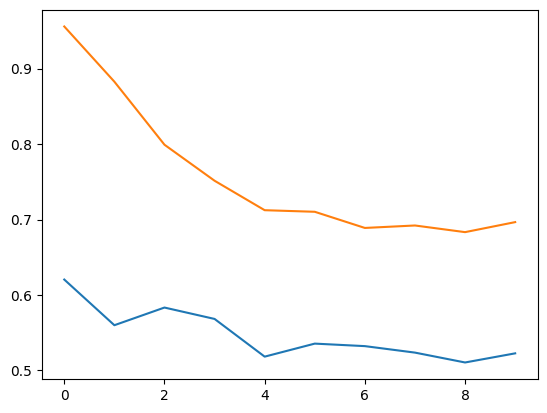

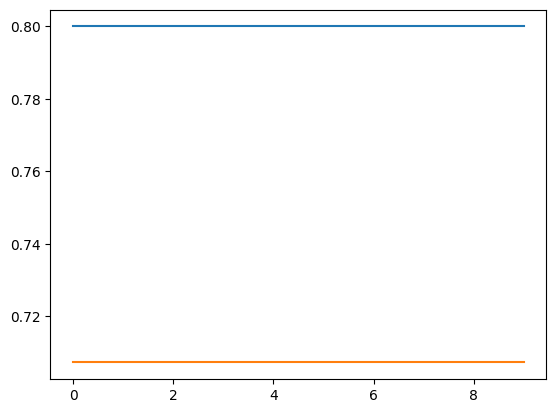

In [21]:
history = model1.fit(train_X, y_train, batch_size=6, epochs=10, validation_data=(X_val, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

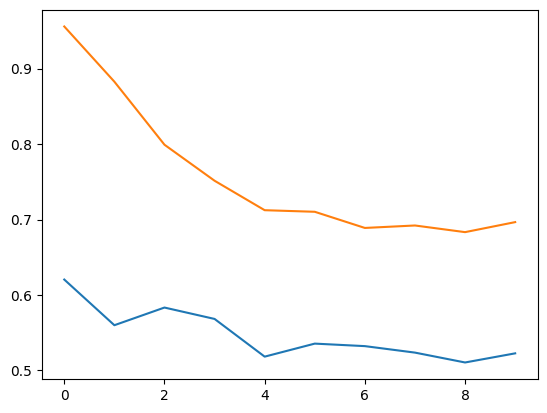

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

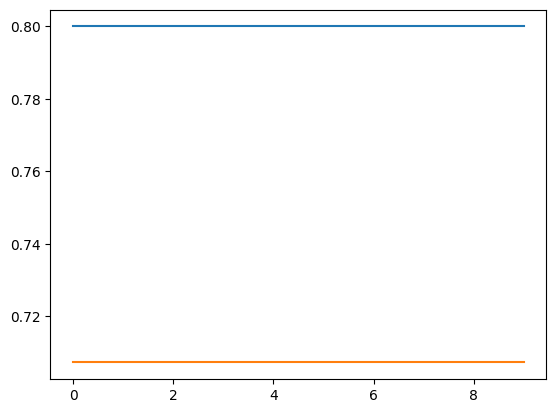

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [24]:
#Evaluate the model on the test data after training your model
score = model1.evaluate(test_X,test_Y, verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 [==============================] - 1s 159ms/step - loss: 0.6200 - accuracy: 0.7475

Keras CNN binary accuracy: 0.747474730014801 



In [25]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on new data
predictions = model.predict(X_test)

# Convert predictions to binary values
predictions_binary = np.round(predictions)

# Calculate precision, recall, and F-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions_binary, zero_division=1)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', fscore)

4/4 [==============================] - 1s 141ms/step
Precision: [1.         0.74747475]
Recall: [0. 1.]
F-score: [0.         0.85549133]


In [26]:
model1.save("m1.h5")

In [27]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [46]:
model3 = Sequential()
#
model3.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model3.add(Flatten())
model3.add(Dense(256, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation = "relu"))

In [47]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
history4 = model3.fit(train_X, y_train, batch_size=6, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
27/27 [==============================] - 6s 151ms/step - loss: 0.6518 - accuracy: 0.8938 - val_loss: 0.0748 - val_accuracy: 0.9756
Epoch 2/10
27/27 [==============================] - 4s 140ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0260 - val_accuracy: 0.9756
Epoch 3/10
27/27 [==============================] - 4s 137ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9756
Epoch 4/10
27/27 [==============================] - 4s 138ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 4s 164ms/step - loss: 1.6337e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 4s 138ms/step - loss: 5.5664e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 4s 140ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.000

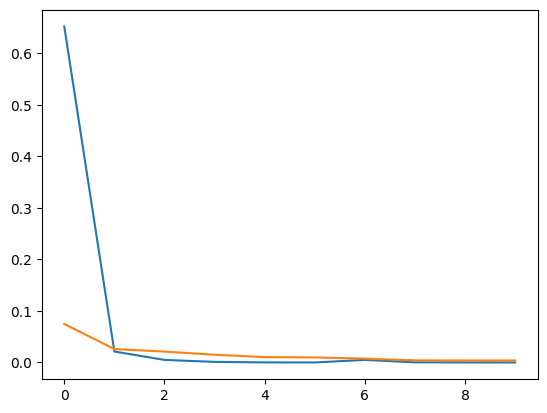

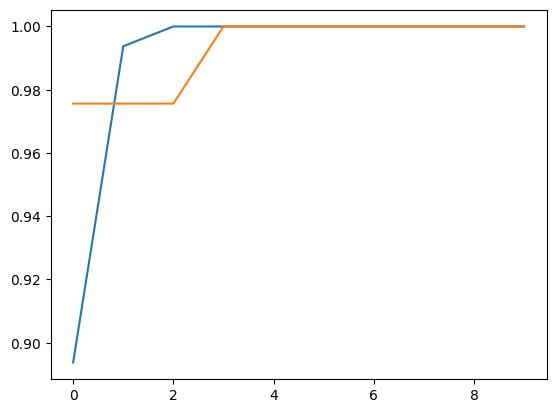

In [49]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.show()
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.show()

In [50]:
model3.save("m3.h5")

In [51]:
predictions = model3.predict(X_test)

4/4 [==============================] - 1s 76ms/step


In [52]:
predictions

array([[13.129399  ],
       [ 0.        ],
       [ 4.217748  ],
       [ 3.1343567 ],
       [ 1.4533572 ],
       [ 0.        ],
       [ 8.593661  ],
       [ 8.333556  ],
       [ 0.        ],
       [ 2.2768059 ],
       [ 1.1203666 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 6.9860854 ],
       [ 0.        ],
       [ 0.81305647],
       [ 4.4828315 ],
       [23.173664  ],
       [ 4.3428674 ],
       [ 0.        ],
       [ 2.8794274 ],
       [17.476864  ],
       [ 9.622287  ],
       [ 0.37010407],
       [ 2.5347276 ],
       [ 3.6025343 ],
       [ 1.5072849 ],
       [ 0.        ],
       [ 8.153028  ],
       [ 0.        ],
       [ 5.644327  ],
       [ 2.7025688 ],
       [ 0.        ],
       [ 4.409115  ],
       [ 4.17458   ],
       [ 0.        ],
       [ 2.1468568 ],
       [ 3.4370985 ],
       [ 0.        ],
       [20.44093   ],
       [ 0.        ],
       [ 0.        ],
       [ 3.0382938 ],
       [ 2.9385777 ],
       [12